In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

# Importing Data
1. Randomly shuffle the dataset by taking a random seed of “42”. Create a testing set from the last 20%
rows of the dataframe (these must be the same for all the students). The remaining rows will be the 
training + validation set, with training : validation ratio of 80% : 20%. Determine 
A) number of rows in training, validation and test sets, along with the structure, datatypes and 
value counts of the dataframes.

In [16]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)
df_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [21]:
df=df.sample(frac=1,random_state=42)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


In [22]:
test=df.sample(frac=0.2,random_state=42)
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112582,72711.0,1.178598,0.165963,0.121668,1.092826,0.039454,-0.102678,0.035372,0.000913,0.106360,...,0.071288,0.206156,-0.161400,-0.462839,0.643265,-0.218767,0.025268,0.016461,29.99,0
77687,57164.0,-0.754196,0.816714,1.900594,-0.204846,0.258701,-0.183295,0.847090,-0.008486,-0.600570,...,0.159257,0.665341,-0.367997,0.252736,0.403427,0.530817,0.080610,-0.116282,20.62,0
255500,157256.0,-0.613051,0.984764,-0.090300,-0.795440,2.018146,-0.217026,1.562558,-0.253562,-1.155665,...,0.133917,0.465613,-0.851996,-1.294652,1.493782,0.198222,-0.020264,0.014614,13.23,0
38712,39509.0,1.154826,0.166233,0.593458,0.502893,-0.315514,-0.307808,-0.093892,0.052094,-0.270624,...,-0.160183,-0.460871,0.173390,0.225906,0.094777,0.093054,-0.014995,0.008507,4.49,0
111915,72427.0,-0.252670,1.023347,1.304723,0.411112,0.303165,-0.424341,0.591484,-0.022438,-0.676465,...,-0.123666,-0.300036,0.074943,0.051479,-0.789975,0.115854,0.156781,0.172765,0.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74202,55468.0,0.859620,-1.406677,0.724688,-0.425782,-1.648805,-0.600154,-0.575056,-0.213665,-0.643074,...,0.559505,1.031732,-0.354315,0.493802,0.376934,-0.082945,-0.003714,0.075481,279.00,0
13099,22991.0,1.275403,1.452099,-1.639234,1.729365,1.233749,-1.474448,0.745976,-0.491582,0.726019,...,-0.379150,-0.707561,-0.274918,-0.474011,0.931377,-0.305739,0.017770,0.088569,6.79,0
17755,28887.0,-0.633344,0.805051,1.554463,0.569618,0.279874,-0.876071,0.712800,-0.167978,-0.538170,...,-0.146279,-0.426026,0.174672,0.357512,0.002258,-0.677499,-0.053989,0.024806,9.99,0
148544,90030.0,2.114382,0.113226,-1.192066,0.448484,0.353231,-0.748418,0.142854,-0.426125,1.727839,...,-0.474008,-0.933726,0.254823,-0.689354,-0.196722,0.196940,-0.092103,-0.071255,1.98,0


In [23]:
df=df.drop(test.index)

In [24]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,71750.0,0.960530,-1.006608,0.799673,-1.216255,-1.541568,-0.670999,-0.610605,0.058303,1.696968,...,0.254714,0.653521,-0.204047,0.621861,0.370590,0.070796,0.015218,0.037579,135.00,0
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


In [25]:
train=df.sample(frac=0.8,random_state=42)
validation=df.drop(train.index)

In [26]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
114927,73678.0,-2.609113,2.822918,0.712443,1.048814,-0.934928,0.558516,-2.521474,-4.325652,-1.100374,...,-2.695104,0.382995,0.080224,0.389790,0.347007,-0.429157,0.145132,0.164582,1.00,0
186208,126999.0,1.813496,-1.455597,-0.443182,-0.766367,-1.364647,-0.479992,-0.884143,0.002555,-0.158375,...,0.105859,-0.055764,0.264723,-0.009311,-0.618848,-0.519544,-0.017572,-0.024625,159.00,0
165680,117591.0,-0.320828,0.343496,-0.127687,-1.470046,1.544994,1.564496,0.747225,0.376990,0.069097,...,0.545958,1.797851,-0.304223,-0.872752,0.017761,-0.313241,0.236097,0.160772,53.35,0
11156,19317.0,1.229060,-0.255966,1.045040,-0.514545,-1.128524,-0.769656,-0.637209,-0.128126,3.074451,...,-0.153918,0.038965,-0.035834,0.354585,0.479867,-0.727036,0.066187,0.031209,11.85,0
177030,123012.0,2.053455,-0.022310,-1.055762,0.404132,-0.066611,-1.116762,0.205319,-0.338479,0.461957,...,-0.277349,-0.633361,0.340592,0.000897,-0.296081,0.199315,-0.064226,-0.059358,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63724,50845.0,1.400968,-1.339036,1.216992,-1.089058,-2.121327,-0.340858,-1.501327,-0.007143,-1.100566,...,-0.221289,-0.105032,0.038187,0.399403,0.252613,-0.199889,0.076812,0.038243,39.90,0
282646,171042.0,-0.593250,0.814954,-0.473409,-0.522724,0.140995,-0.896373,0.491457,0.298883,-0.112226,...,-0.083177,-0.222472,0.245595,0.015406,-0.743970,0.122830,-0.093093,0.005600,22.57,0
29907,35689.0,-1.014675,0.407006,1.767618,-1.948179,-0.226589,-1.096734,0.769193,0.007968,1.151378,...,-0.231749,-0.524090,-0.205566,0.354901,0.716011,-0.946873,0.298499,0.129921,38.21,0
247800,153696.0,2.137405,-1.324118,0.082695,-0.674389,-1.422959,0.434276,-1.707804,0.264655,1.087827,...,0.105821,0.572797,0.241753,0.496638,-0.295029,-0.205109,0.054778,-0.034179,3.30,0


In [27]:
validation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214337,139631.0,-0.688944,1.292153,-0.564281,-1.457526,2.258333,-0.323270,1.678984,-0.104128,-1.285351,...,-0.006880,-0.171568,-0.720019,-0.419435,1.211991,0.670916,-0.103986,0.030084,8.95,0
158290,111116.0,-0.198807,1.205334,-0.113648,-0.246482,0.751390,-0.359111,0.493849,-0.948922,1.573062,...,0.935082,0.674378,-0.113983,0.394220,-0.384530,-0.448942,0.493217,0.289282,1.00,0
206357,136177.0,-0.648081,0.320011,0.112924,-1.535076,-0.191904,-1.208250,0.453343,0.180405,0.389545,...,-0.400653,-1.150917,0.691949,-0.040308,-0.825938,0.011530,-0.176292,-0.071526,45.85,0
257395,158143.0,-0.859208,1.850408,-1.392449,-1.416790,1.290569,-1.433808,1.730253,-0.468233,0.287973,...,0.088973,0.778421,-0.285969,-0.595771,0.018616,0.145071,0.819700,0.510106,1.00,0
225485,144267.0,1.786896,-1.053204,0.169414,0.716106,-0.991835,0.798244,-1.181350,0.232048,2.037239,...,0.143343,0.654280,-0.033453,-0.913444,-0.269994,0.444475,0.034464,-0.022000,109.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129981,79256.0,1.245346,-0.493618,0.869166,-0.705508,-1.389078,-0.873048,-0.708425,0.080487,2.124594,...,-0.035339,0.050370,-0.011577,0.354692,0.432374,-0.679892,0.080557,0.030999,1.00,0
65725,51717.0,-1.654749,0.615735,0.652041,-1.213781,-0.580691,-0.358295,1.197547,0.340408,-0.467009,...,-0.032137,-0.105569,-0.054096,0.058693,0.706208,1.042379,-0.012311,-0.052619,182.00,0
194027,130410.0,1.887200,-0.310380,-1.424391,0.582389,0.672704,1.240693,-0.532214,0.361545,1.222261,...,0.222073,1.234400,0.034773,-0.311531,0.058957,0.919369,0.029783,-0.045539,2.36,0
54886,46673.0,-0.742665,-0.033844,2.534524,-1.873237,-0.838732,0.047068,-0.295144,0.314181,-1.321238,...,0.532312,1.338411,-0.306185,0.257687,0.308830,-0.133652,0.057102,0.055674,29.95,0


# Data Cleaning
1. Analyse the data.
2. Check for missing values and logically impute the dataset. Normalize the columns

Fraudulent transactions: 0.17%

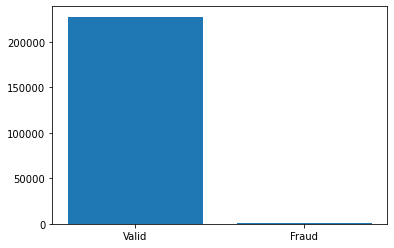

In [28]:
plt.bar(['Valid','Fraud'],list(df['Class'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds= df['Class'].value_counts()[1]/sum(df['Class'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

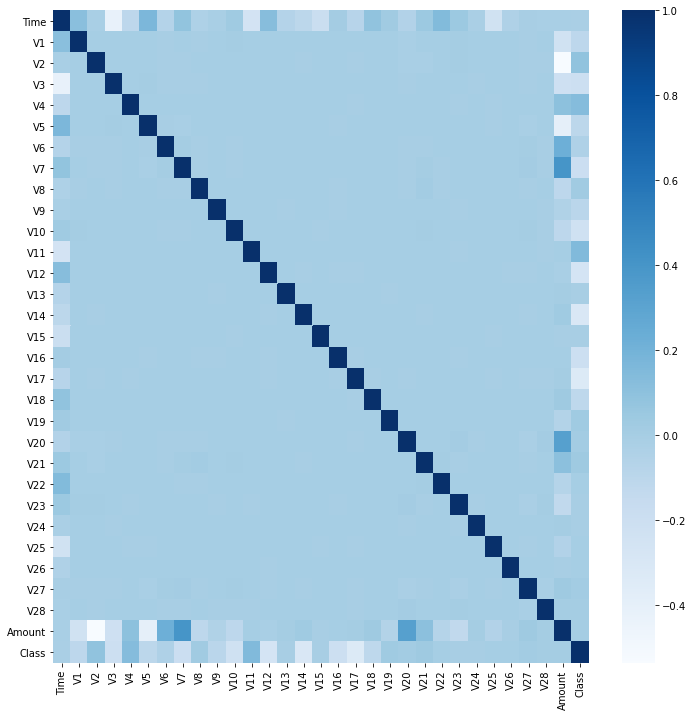

In [29]:
fig=plt.figure(figsize= (12, 12)) 
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

In [30]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
114927,73678.0,-2.609113,2.822918,0.712443,1.048814,-0.934928,0.558516,-2.521474,-4.325652,-1.100374,...,-2.695104,0.382995,0.080224,0.389790,0.347007,-0.429157,0.145132,0.164582,1.00,0
186208,126999.0,1.813496,-1.455597,-0.443182,-0.766367,-1.364647,-0.479992,-0.884143,0.002555,-0.158375,...,0.105859,-0.055764,0.264723,-0.009311,-0.618848,-0.519544,-0.017572,-0.024625,159.00,0
165680,117591.0,-0.320828,0.343496,-0.127687,-1.470046,1.544994,1.564496,0.747225,0.376990,0.069097,...,0.545958,1.797851,-0.304223,-0.872752,0.017761,-0.313241,0.236097,0.160772,53.35,0
11156,19317.0,1.229060,-0.255966,1.045040,-0.514545,-1.128524,-0.769656,-0.637209,-0.128126,3.074451,...,-0.153918,0.038965,-0.035834,0.354585,0.479867,-0.727036,0.066187,0.031209,11.85,0
177030,123012.0,2.053455,-0.022310,-1.055762,0.404132,-0.066611,-1.116762,0.205319,-0.338479,0.461957,...,-0.277349,-0.633361,0.340592,0.000897,-0.296081,0.199315,-0.064226,-0.059358,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63724,50845.0,1.400968,-1.339036,1.216992,-1.089058,-2.121327,-0.340858,-1.501327,-0.007143,-1.100566,...,-0.221289,-0.105032,0.038187,0.399403,0.252613,-0.199889,0.076812,0.038243,39.90,0
282646,171042.0,-0.593250,0.814954,-0.473409,-0.522724,0.140995,-0.896373,0.491457,0.298883,-0.112226,...,-0.083177,-0.222472,0.245595,0.015406,-0.743970,0.122830,-0.093093,0.005600,22.57,0
29907,35689.0,-1.014675,0.407006,1.767618,-1.948179,-0.226589,-1.096734,0.769193,0.007968,1.151378,...,-0.231749,-0.524090,-0.205566,0.354901,0.716011,-0.946873,0.298499,0.129921,38.21,0
247800,153696.0,2.137405,-1.324118,0.082695,-0.674389,-1.422959,0.434276,-1.707804,0.264655,1.087827,...,0.105821,0.572797,0.241753,0.496638,-0.295029,-0.205109,0.054778,-0.034179,3.30,0


In [31]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112582,72711.0,1.178598,0.165963,0.121668,1.092826,0.039454,-0.102678,0.035372,0.000913,0.106360,...,0.071288,0.206156,-0.161400,-0.462839,0.643265,-0.218767,0.025268,0.016461,29.99,0
77687,57164.0,-0.754196,0.816714,1.900594,-0.204846,0.258701,-0.183295,0.847090,-0.008486,-0.600570,...,0.159257,0.665341,-0.367997,0.252736,0.403427,0.530817,0.080610,-0.116282,20.62,0
255500,157256.0,-0.613051,0.984764,-0.090300,-0.795440,2.018146,-0.217026,1.562558,-0.253562,-1.155665,...,0.133917,0.465613,-0.851996,-1.294652,1.493782,0.198222,-0.020264,0.014614,13.23,0
38712,39509.0,1.154826,0.166233,0.593458,0.502893,-0.315514,-0.307808,-0.093892,0.052094,-0.270624,...,-0.160183,-0.460871,0.173390,0.225906,0.094777,0.093054,-0.014995,0.008507,4.49,0
111915,72427.0,-0.252670,1.023347,1.304723,0.411112,0.303165,-0.424341,0.591484,-0.022438,-0.676465,...,-0.123666,-0.300036,0.074943,0.051479,-0.789975,0.115854,0.156781,0.172765,0.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74202,55468.0,0.859620,-1.406677,0.724688,-0.425782,-1.648805,-0.600154,-0.575056,-0.213665,-0.643074,...,0.559505,1.031732,-0.354315,0.493802,0.376934,-0.082945,-0.003714,0.075481,279.00,0
13099,22991.0,1.275403,1.452099,-1.639234,1.729365,1.233749,-1.474448,0.745976,-0.491582,0.726019,...,-0.379150,-0.707561,-0.274918,-0.474011,0.931377,-0.305739,0.017770,0.088569,6.79,0
17755,28887.0,-0.633344,0.805051,1.554463,0.569618,0.279874,-0.876071,0.712800,-0.167978,-0.538170,...,-0.146279,-0.426026,0.174672,0.357512,0.002258,-0.677499,-0.053989,0.024806,9.99,0
148544,90030.0,2.114382,0.113226,-1.192066,0.448484,0.353231,-0.748418,0.142854,-0.426125,1.727839,...,-0.474008,-0.933726,0.254823,-0.689354,-0.196722,0.196940,-0.092103,-0.071255,1.98,0


In [32]:
validation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214337,139631.0,-0.688944,1.292153,-0.564281,-1.457526,2.258333,-0.323270,1.678984,-0.104128,-1.285351,...,-0.006880,-0.171568,-0.720019,-0.419435,1.211991,0.670916,-0.103986,0.030084,8.95,0
158290,111116.0,-0.198807,1.205334,-0.113648,-0.246482,0.751390,-0.359111,0.493849,-0.948922,1.573062,...,0.935082,0.674378,-0.113983,0.394220,-0.384530,-0.448942,0.493217,0.289282,1.00,0
206357,136177.0,-0.648081,0.320011,0.112924,-1.535076,-0.191904,-1.208250,0.453343,0.180405,0.389545,...,-0.400653,-1.150917,0.691949,-0.040308,-0.825938,0.011530,-0.176292,-0.071526,45.85,0
257395,158143.0,-0.859208,1.850408,-1.392449,-1.416790,1.290569,-1.433808,1.730253,-0.468233,0.287973,...,0.088973,0.778421,-0.285969,-0.595771,0.018616,0.145071,0.819700,0.510106,1.00,0
225485,144267.0,1.786896,-1.053204,0.169414,0.716106,-0.991835,0.798244,-1.181350,0.232048,2.037239,...,0.143343,0.654280,-0.033453,-0.913444,-0.269994,0.444475,0.034464,-0.022000,109.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129981,79256.0,1.245346,-0.493618,0.869166,-0.705508,-1.389078,-0.873048,-0.708425,0.080487,2.124594,...,-0.035339,0.050370,-0.011577,0.354692,0.432374,-0.679892,0.080557,0.030999,1.00,0
65725,51717.0,-1.654749,0.615735,0.652041,-1.213781,-0.580691,-0.358295,1.197547,0.340408,-0.467009,...,-0.032137,-0.105569,-0.054096,0.058693,0.706208,1.042379,-0.012311,-0.052619,182.00,0
194027,130410.0,1.887200,-0.310380,-1.424391,0.582389,0.672704,1.240693,-0.532214,0.361545,1.222261,...,0.222073,1.234400,0.034773,-0.311531,0.058957,0.919369,0.029783,-0.045539,2.36,0
54886,46673.0,-0.742665,-0.033844,2.534524,-1.873237,-0.838732,0.047068,-0.295144,0.314181,-1.321238,...,0.532312,1.338411,-0.306185,0.257687,0.308830,-0.133652,0.057102,0.055674,29.95,0


# Classification:
1. Train a logistic regression model on the training set partition by taking all the features. Calculate the 
error on the validation set.

In [33]:
model = LogisticRegression()

In [34]:
model.fit(train.drop('Class',axis=1),train['Class'])

D:\sanjay\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = model.predict(test.drop('Class',axis=1))

In [36]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(test['Class'], predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.67      0.57      0.62        99

    accuracy                           1.00     56961
   macro avg       0.84      0.78      0.81     56961
weighted avg       1.00      1.00      1.00     56961



2. Train a neural network model (MLPClassifier) by taking all the features and predicting the result. Fix 
the random_state for training. Choose the solver as ‘adam’, and set the number of hidden layers to (10, 
2). Vary the hidden layers to find the best set of results on validation set. Explore different training 
parameters of MLP.

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=100,activation = 'relu',solver='adam',random_state=42)

In [41]:
X_train=train.drop('Class',axis=1)

In [42]:
Y_train=train['Class']

In [43]:
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=100, random_state=42)

In [44]:
X_val=validation.drop('Class',axis=1)
y_val=validation['Class']
y_pred = classifier.predict(X_val)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

## 3. Find the evaluation scores by constructing the confusion matrix (True Positive, False positive, True
Negative and False Negatives). Precision = TP/(TP+FP), Recall = TP/(TP+FN)


In [47]:
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
confusion_m = confusion_matrix( y_val,y_pred)
print("Accuracy of MLPClassifier : ''", accuracy(confusion_m))

Accuracy of MLPClassifier : '' 0.9984858127235621


In [48]:
confusion_m

array([[45500,     0],
       [   69,     0]], dtype=int64)

In [49]:
precision=(confusion_m[0][0])/(confusion_m[0][0]+confusion_m[0][1])
recall=(confusion_m[0][0])/(confusion_m[0][0]+confusion_m[1][0])

In [50]:
print("Precision: ",precision)
print("Recall: ",recall)

Precision:  1.0
Recall:  0.9984858127235621


### 4. Plot the precision and recall values on the same plot for different training iterations for the MLP model by varying max_iter as 25, 50, 75, …. 

In [51]:
classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=25,activation = 'relu',solver='adam',random_state=42)

In [52]:
X_train=train.drop('Class',axis=1)
Y_train=train['Class']
X_val=validation.drop('Class',axis=1)
y_val=validation['Class']

In [53]:
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=25, random_state=42)

In [54]:
y_pred = classifier.predict(X_val)
confusion_m_25 = confusion_matrix(y_pred, y_val)
print(confusion_m_25)

[[45500    69]
 [    0     0]]


In [55]:
precision_25=(confusion_m[0][0])/(confusion_m[0][0]+confusion_m[0][1])
recall_25=(confusion_m[0][0])/(confusion_m[0][0]+confusion_m[1][0])
print("Precision: ",precision_25)
print("Recall: ",recall_25)

Precision:  1.0
Recall:  0.9984858127235621


In [56]:
classifier = MLPClassifier(hidden_layer_sizes=(30,5), max_iter=500,activation = 'relu',solver='adam',random_state=42)

In [57]:
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(30, 5), max_iter=500, random_state=42)

In [58]:
y_pred = classifier.predict(X_val)
confusion_m_50 = confusion_matrix(y_pred, y_val)
print(confusion_m_50)

[[45500    69]
 [    0     0]]


In [59]:
precision_50=(confusion_m_50[0][0])/(confusion_m_50[0][0]+confusion_m_50[0][1])
recall_50=(confusion_m_50[0][0])/(confusion_m_50[0][0]+confusion_m_50[1][0])
print("Precision: ",precision_50)
print("Recall: ",recall_50)

Precision:  0.9984858127235621
Recall:  1.0
